In [1]:
import matplotlib.pyplot as plt
# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

In [2]:
survivors = pd.read_csv('train.csv')
survivors.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
len(survivors["Embarked"].unique())
survivors["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [4]:
nasurvivors=survivors.dropna()

In [5]:
# Assign the data to X and y
# All useful data
# X = survivors[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]]

#All numerical data
X = nasurvivors[["Pclass", "Age", "SibSp", "Parch", "Fare"]]
y = nasurvivors["Survived"].values.reshape(-1, 1)
print(X.shape, y.shape)

(183, 5) (183, 1)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [7]:
X_train= X_train.values
y_train= np.stack(y_train, axis=1)
y_train = np.ravel(y_train)

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))

In [9]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\warne\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [10]:
len(X_train_scaled)

137

In [11]:
print(len(y_train))

137


k: 1, Train/Test Score: 1.000/0.587
k: 3, Train/Test Score: 0.796/0.696
k: 5, Train/Test Score: 0.737/0.630
k: 7, Train/Test Score: 0.701/0.674
k: 9, Train/Test Score: 0.737/0.674
k: 11, Train/Test Score: 0.730/0.674
k: 13, Train/Test Score: 0.715/0.674
k: 15, Train/Test Score: 0.715/0.674
k: 17, Train/Test Score: 0.701/0.674
k: 19, Train/Test Score: 0.708/0.674
k: 21, Train/Test Score: 0.701/0.652
k: 23, Train/Test Score: 0.715/0.652
k: 25, Train/Test Score: 0.708/0.630
k: 27, Train/Test Score: 0.708/0.652
k: 29, Train/Test Score: 0.708/0.652


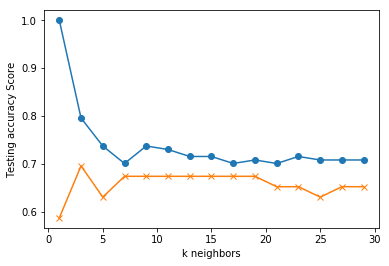

In [16]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()